# **PHASE 1 : TRAITEMENT DES IMAGES**

# **1 - Importation des bibliothèques**

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
import tensorflow_hub as tf_hub
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
dataset_path = '../input/weather-dataset/dataset'
class_names = sorted(os.listdir(dataset_path))
n_classes = len(class_names)
class_dis = [len(os.listdir(dataset_path + "/" + name)) for name in class_names]
print(n_classes)
class_dis

11


[698, 851, 475, 639, 591, 377, 526, 232, 1160, 692, 621]

In [3]:
fig = px.pie(names=class_names, values=class_dis, title="Class Distribution")
fig.update_layout({'title':{'x':0.5}})
fig.show()

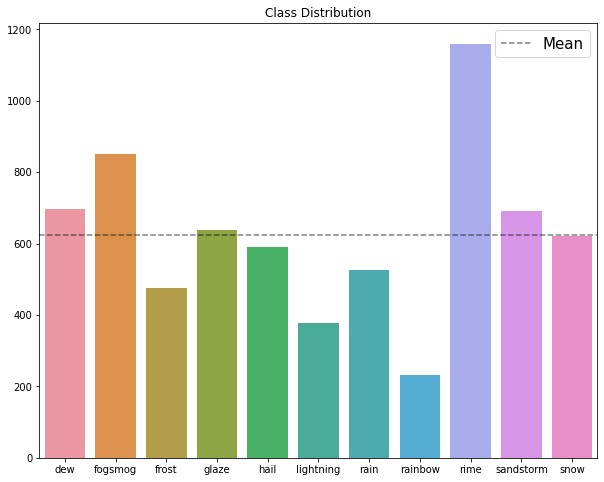

In [4]:
plt.figure(figsize=(10,8))
sb.barplot(
    x=class_names, 
    y=class_dis
)
plt.axhline(np.mean(class_dis), alpha=0.5, linestyle='--', color='k', label="Mean")
plt.title("Class Distribution")
plt.legend(fontsize=15)
plt.show()

In [5]:
# Initialize DataGenerator
train_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=20, validation_split=0.2)

# Load Data
train_ds = train_gen.flow_from_directory(dataset_path, target_size=(256,256), class_mode="binary", subset='training', shuffle=True, batch_size=32)
valid_ds = train_gen.flow_from_directory(dataset_path, target_size=(256,256), class_mode="binary", subset='validation', shuffle=True, batch_size=32)

Found 5493 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.
